# Mustererkennung/Machine Learning - Assignment 8



In [81]:
![ -e 'iris.data' ] || wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
![ -e 'zip.train' ] || ( wget https://web.stanford.edu/~hastie/ElemStatLearn/datasets/zip.train.gz && gzip -d zip.train.gz )
![ -e 'zip.test' ] || ( wget https://web.stanford.edu/~hastie/ElemStatLearn/datasets/zip.test.gz && gzip -d zip.test.gz )

--2021-01-18 03:10:49--  https://web.stanford.edu/~hastie/ElemStatLearn/datasets/zip.train.gz
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200, 2607:f6d0:0:925a::ab43:d7c8
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1829071 (1,7M) [application/x-gzip]
Saving to: ‘zip.train.gz’

zip.train.gz        100%[===================>]   1,74M   294KB/s    in 8,6s    

2021-01-18 03:10:58 (208 KB/s) - ‘zip.train.gz’ saved [1829071/1829071]

--2021-01-18 03:10:59--  https://web.stanford.edu/~hastie/ElemStatLearn/datasets/zip.test.gz
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200, 2607:f6d0:0:925a::ab43:d7c8
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 439208 (429K) [application/x-gzip]
Saving to: ‘zip.test.gz’

zip.test.gz         100%[===================>] 428,91K   190KB/s    in 

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
class Classifier:
    
    def accuracy(self, labels, predictions):
        return np.mean(labels == predictions)


data = pd.read_csv("iris.data", header=None)
data.head(n=5)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Splitting the data into training/test and according to their class memberships

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data[list(range(4))], data[4], test_size=0.2, random_state=None, stratify=data[4])

X_train_setosa = X_train[y_train=='Iris-setosa'].to_numpy()
X_train_versicolor = X_train[y_train=='Iris-versicolor'].to_numpy()
X_train_virginica = X_train[y_train=='Iris-virginica'].to_numpy()

X_test_setosa_v_v = X_test.to_numpy()
y_test_setosa_v_v = (y_test == 'Iris-setosa').astype(int).to_numpy()

X_test_versicolor_virginica = X_test[y_test!='Iris-setosa'].to_numpy()
y_test_versicolor_virginica = (y_test[y_test!='Iris-setosa'] == 'Iris-versicolor').astype(int).to_numpy()

In [74]:
y_train1 = (y_train == 'Iris-setosa').astype(int).to_numpy()
X_train2 = X_train.to_numpy()[~y_train1.astype(bool)]
y_train2 = (y_train[~y_train1.astype(bool)] == 'Iris-versicolor').astype(int).to_numpy()

In [7]:
class PerceptronClassifier(Classifier):
    def __init__(self, learning_rate=0.5, max_iters=100):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.errors = []
        self.weights = None
    
    def fit(self, X, y):
        X = np.hstack([X, np.ones((X.shape[0], 1))])
        self.weights = np.zeros(X.shape[1])
        for i in range(self.max_iters):
            error = 0
            for xj, yj in zip(X, y):
                dw = self.learning_rate * (yj - self.predict(xj[:-1].reshape(1, -1)))
                self.weights += dw * xj
                error += int(dw != 0)
            self.errors.append(error)
            if error == 0:
                break
        return self
    
    def predict_z(self, X):
        return X @ self.weights[:-1] + self.weights[-1]
    
    def predict(self, X):
        return (self.predict_z(X) >= 0.0).astype(int)

In [8]:
%%time
model = PerceptronClassifier()
model.fit(X_train, y_train1)
y_hat_train1 = model.predict(X_train.to_numpy())
y_hat_test1 = model.predict(X_test_setosa_v_v)

CPU times: user 7.55 ms, sys: 523 µs, total: 8.07 ms
Wall time: 6.32 ms


In [9]:
print(f"Train accuracy: {model.accuracy(y_train1, y_hat_train1)}")
print(f"Test accuracy: {model.accuracy(y_test_setosa_v_v, y_hat_test1)}")

Train accuracy: 1.0
Test accuracy: 1.0


In [63]:
plot_axis = [1, 2]
cmap = 'plasma'
X_center = np.mean(X_train.to_numpy(), axis=0)
X_min = np.min(X_train.to_numpy(), axis=0)
X_max = np.max(X_train.to_numpy(), axis=0)
X_mesh = np.meshgrid(*([np.arange(X_min[i], X_max[i], 0.02) if i in plot_axis else X_center[i] for i in range(len(X_min))]), indexing='ij')
X_mesh = [i.reshape((i.shape[plot_axis[0]], i.shape[plot_axis[1]])) for i in X_mesh]
y_mesh1 = model.predict(np.array([X_mesh[i].ravel() for i in range(len(X_mesh))]).T).reshape(X_mesh[0].shape)

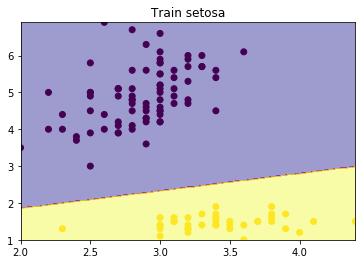

In [67]:
plt.xlim(X_min[plot_axis[0]], X_max[plot_axis[0]])
plt.ylim(X_min[plot_axis[1]], X_max[plot_axis[1]])
plt.title('Train setosa')
plt.contourf(X_mesh[plot_axis[0]], X_mesh[plot_axis[1]], y_mesh1, alpha=.4, cmap=cmap, extend='both')
plt.scatter(X_train.to_numpy()[:, plot_axis[0]], X_train.to_numpy()[:, plot_axis[1]], c=y_train1)
plt.show()

In [62]:
 %%time
model = PerceptronClassifier()
model.fit(X_train, y_train1)
y_hat_train1 = model.predict(X_train.to_numpy())
y_hat_test1 = model.predict(X_test_setosa_v_v)

CPU times: user 6.72 ms, sys: 52 µs, total: 6.78 ms
Wall time: 4.89 ms


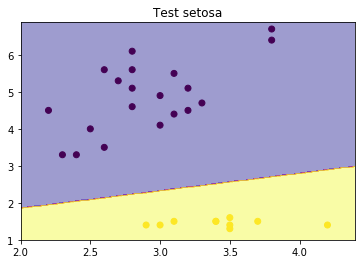

In [66]:
plt.title('Test setosa')
plt.contourf(X_mesh[plot_axis[0]], X_mesh[plot_axis[1]], y_mesh1, alpha=.4, cmap=cmap, extend='both')
plt.scatter(X_test_setosa_v_v[:, plot_axis[0]], X_test_setosa_v_v[:, plot_axis[1]], c=y_test_setosa_v_v)
plt.show()

In [75]:
%%time
model2 = PerceptronClassifier()
model2.fit(X_train2, y_train2)
y_hat_train2 = model.predict(X_train2)
y_hat_test2 = model.predict(X_test_versicolor_virginica)

CPU times: user 161 ms, sys: 25.4 ms, total: 187 ms
Wall time: 144 ms


In [76]:
print(f"Train accuracy: {model.accuracy(y_train2, y_hat_train2)}")
print(f"Test accuracy: {model.accuracy(y_test_versicolor_virginica, y_hat_test2)}")

Train accuracy: 0.5
Test accuracy: 0.5


In [77]:
 y_mesh2 = model2.predict(np.array([X_mesh[i].ravel() for i in range(len(X_mesh))]).T).reshape(X_mesh[0].shape)

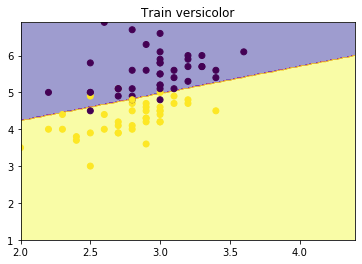

In [80]:
plt.xlim(X_min[plot_axis[0]], X_max[plot_axis[0]])
plt.ylim(X_min[plot_axis[1]], X_max[plot_axis[1]])
plt.title('Train versicolor')
plt.contourf(X_mesh[plot_axis[0]], X_mesh[plot_axis[1]], y_mesh2, alpha=.4, cmap=cmap, extend='both')
plt.scatter(X_train2[:, plot_axis[0]], X_train2[:, plot_axis[1]], c=y_train2)
plt.show()

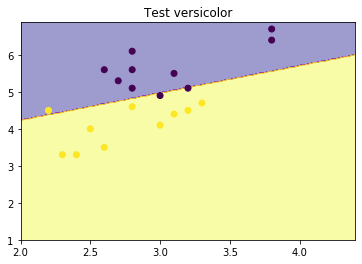

In [79]:
 plt.title('Test versicolor')
plt.contourf(X_mesh[plot_axis[0]], X_mesh[plot_axis[1]], y_mesh2, alpha=.4, cmap=cmap, extend='both')
plt.scatter(X_test_versicolor_virginica[:, plot_axis[0]], X_test_versicolor_virginica[:, plot_axis[1]], c=y_test_versicolor_virginica)
plt.show()

Train dataset for the second model is not linearly separable, so `fit()` would never stop, if there was no iteration count limit.

In [82]:
training_data_zip = np.array(pd.read_csv('zip.train', sep=' ', header=None))
test_data_zip = np.array(pd.read_csv('zip.test', sep =' ',header=None))

X_zip_train, y_zip_train = training_data_zip[:,1:-1], training_data_zip[:,0]
X_zip_test, y_zip_test = test_data_zip[:,1:], test_data_zip[:,0]

In [287]:
class MultilayerPerceptronClassifier(Classifier):
    def __init__(self, hidden_neurons_numbers, max_iters=50, learning_rate=0.3):
        self.hidden_neurons_numbers = tuple(hidden_neurons_numbers)
        self.max_iters = max_iters
        self.learning_rate = learning_rate
    
    def gradient(self, X, y, W):
        epsilon = 0.7
        L0 = self.loss(X, y, W)
        for i, w in enumerate(W):
            dw = np.zeros_like(w)
            gr = np.zeros_like(w)
            for j in range(w.shape[0]):
                dw[j] = epsilon
                gr[j] = (self.loss(X, y, W[:i] + [w + dw] + W[i + 1:]) - L0) / epsilon
                dw[j] = 0.0
            yield gr
    
    def loss(self, X, y, W):
        return ((y - self.predict_with(W, X)) ** 2).mean()
    
    def predict_with(self, W, X):
        for w in W:
            X = self.activate(X @ w)
        return X
    
    def activate(self, a):
        return 1.0 / (1.0 + np.exp(-a))
   
    def fit(self, X, Y):
        Y = Y.reshape(-1, 1)
        X = np.hstack([X, np.ones((X.shape[0], 1))])
        neuron_numbers = (X.shape[1],) + self.hidden_neurons_numbers + (1,)
        self.weights = list((np.random.rand(neuron_numbers[i], neuron_numbers[i + 1]) - .5) for i in range(len(neuron_numbers) - 1))
        for w in self.weights:
            w[:, -1].fill(0)
            w[-1, -1] = 1
        for it in range(self.max_iters):
            stop = True
            nabla_W = tuple(self.gradient(X, Y, self.weights))
            acc_delta = tuple(map(np.zeros_like, self.weights))
            for i, w in enumerate(self.weights):
                delta = -self.learning_rate * nabla_W[i]
                if not np.allclose(delta, 0):
                    stop = False
                acc_delta[i].__iadd__(delta)
            for w, dw in zip(self.weights, acc_delta):
                w.__iadd__(dw)
                w[-1, :].fill(0)
                w[-1, -1] = 1
            if stop:
                break
        return self

    def predict(self, X):
        return np.round(self.predict_with(self.weights, np.hstack([X, np.ones((X.shape[0], 1))]))).astype(int)

In [290]:
%%time
np.random.seed(42)
model3 = MultilayerPerceptronClassifier((32, 16, 8))
model3.fit(X_zip_train[:64], y_zip_train[:64] == 4)
print(model3.accuracy(y_zip_train[:64] == 4, model3.predict(X_zip_train[:64])))

0.84375
CPU times: user 7.62 s, sys: 0 ns, total: 7.62 s
Wall time: 7.64 s
